In [13]:
# Cell 1: Import necessary libraries and load the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the CSV file
df = pd.read_csv("accountlevelfinal.csv")

# Display the first few rows to verify the data
df.head()


,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,...,TierCDWeekendFraction,GiveawayFraction,Cluster,Plan (5),Distance_to_Centroid,PromoPlan_Score,ValuePlan_Score,MarqueePlan_Score,WeekendPlan_Score,Scoring_Plan
0,2023,1,0,0,0,1.000000,0,F,0.381944,0.860599,...,0.0,1.0,3,PromoPlan,0.426726,0.844934,0.088370,0.619137,0.205675,PromoPlan
1,2023,2,2,0,0,0.590331,1,A,0.462963,0.414747,...,0.0,0.0,4,Unidentifiable,0.187007,0.017633,0.256156,0.555686,0.091003,MarqueePlan
2,2023,3,3,0,0,0.544529,1,B,0.368056,0.888249,...,0.0,0.0,2,ValuePlan,0.196246,0.017601,0.278808,0.331776,0.239269,MarqueePlan
3,2023,4,0,0,3,0.137405,1,C,0.361111,0.394009,...,0.0,0.0,2,ValuePlan,0.194166,0.120698,0.369483,0.187657,0.034637,ValuePlan
4,2023,5,0,0,2,0.071247,1,A,0.363426,0.526498,...,0.0,0.0,2,ValuePlan,0.128101,0.068964,0.383762,0.112677,0.028150,ValuePlan


In [14]:
# Cell 2: Select only the specified features and the target column
feature_cols = ["SingleGameTickets", "PartialPlanTickets", "GroupTickets",
    "AvgSpend", "GamesAttended", "FanSegment", "DistanceToArena", "BasketballPropensity",
    "SocialMediaEngagement", "UniqueGamesAttended", "TotalTicketsPurchased", "TierA", "TierB",
    "TierC", "TierD", "TierAFraction", "TierBFraction", "TierCFraction", "TierDFraction",
    "TierABFraction", "TierCDFraction", "FavoriteTier", "WeekendFraction", "TierAWeekendFraction",
    "TierBWeekendFraction", "TierCWeekendFraction", "TierDWeekendFraction", "TierABWeekendFraction",
    "TierCDWeekendFraction", "GiveawayFraction"
]

X = df[feature_cols]
y = df["Scoring_Plan"]

print("Features used for modeling:")
print(X.head())
print("\nTarget column (Scoring_Plan):")
print(y.head())


Features used for modeling:
   SingleGameTickets  PartialPlanTickets  GroupTickets  AvgSpend  \
0                  0                   0             0  1.000000   
1                  2                   0             0  0.590331   
2                  3                   0             0  0.544529   
3                  0                   0             3  0.137405   
4                  0                   0             2  0.071247   

   GamesAttended FanSegment  DistanceToArena  BasketballPropensity  \
0              0          F         0.381944              0.860599   
1              1          A         0.462963              0.414747   
2              1          B         0.368056              0.888249   
3              1          C         0.361111              0.394009   
4              1          A         0.363426              0.526498   

   SocialMediaEngagement  UniqueGamesAttended  ...  TierCDFraction  \
0                    0.3                  0.0  ...             1.0   
1 

In [15]:
# Cell 3: Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 33612 samples
Testing set size: 8404 samples


In [16]:
# Cell 4: Build a pipeline for preprocessing and the RandomForestClassifier

# Identify numeric and categorical columns from the provided features
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Create transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine the transformers in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Create the full pipeline with the preprocessor and a RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=2000, random_state=42))
])


In [17]:
# Cell 5: Create a preprocessing pipeline and a RandomForestClassifier pipeline

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Create transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Create the full pipeline with the preprocessor and a RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=2000, random_state=42))
])


In [18]:
# Cell 5: Train the model on the training data and evaluate performance

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model_pipeline.predict(X_train)
y_train_pred_proba = model_pipeline.predict_proba(X_train)  # probabilities for each class

print("Training Set Evaluation vs Scoring_Plan:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# For a side-by-side comparison, create a DataFrame of results for the first few training samples
train_results = X_train.copy()
train_results["Actual_Scoring_Plan"] = y_train.values
train_results["Predicted_Plan"] = y_train_pred
# Also include the max probability for the predicted class
train_results["Predicted_Probability"] = np.max(y_train_pred_proba, axis=1)
print("\nFirst 5 training samples comparison:")
print(train_results.head())


Training Set Evaluation vs Scoring_Plan:
Classification Report:
              precision    recall  f1-score   support

 MarqueePlan       1.00      1.00      1.00      7313
   PromoPlan       1.00      1.00      1.00      6550
   ValuePlan       1.00      1.00      1.00      9425
 WeekendPlan       1.00      1.00      1.00     10324

    accuracy                           1.00     33612
   macro avg       1.00      1.00      1.00     33612
weighted avg       1.00      1.00      1.00     33612

Accuracy: 1.0

First 5 training samples comparison:
       SingleGameTickets  PartialPlanTickets  GroupTickets  AvgSpend  \
37482                  2                   0             0  0.788804   
26850                  0                   0             2  1.000000   
17692                  2                   0             0  0.320611   
25033                  2                   0             0  0.346056   
39802                  2                   0             0  0.086514   

       GamesAtte

In [19]:
# Cell 6: Evaluate the model on the test data

# Make predictions on the test set
y_test_pred = model_pipeline.predict(X_test)
y_test_pred_proba = model_pipeline.predict_proba(X_test)

print("Test Set Evaluation vs Scoring_Plan:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

# Create a DataFrame for a side-by-side comparison for the test set
test_results = X_test.copy()
test_results["Actual_Scoring_Plan"] = y_test.values
test_results["Predicted_Plan"] = y_test_pred
test_results["Predicted_Probability"] = np.max(y_test_pred_proba, axis=1)
print("\nFirst 5 test samples comparison:")
print(test_results.head())


Test Set Evaluation vs Scoring_Plan:
Classification Report:
              precision    recall  f1-score   support

 MarqueePlan       0.96      0.95      0.95      1829
   PromoPlan       0.98      0.98      0.98      1638
   ValuePlan       0.96      0.97      0.96      2356
 WeekendPlan       0.98      0.97      0.97      2581

    accuracy                           0.97      8404
   macro avg       0.97      0.97      0.97      8404
weighted avg       0.97      0.97      0.97      8404

Accuracy: 0.9676344597810567

First 5 test samples comparison:
       SingleGameTickets  PartialPlanTickets  GroupTickets  AvgSpend  \
11804                  2                   0             0  0.274809   
32854                  2                   0             0  0.534351   
9960                   1                   0             0  0.188295   
6002                   2                   0             0  0.305344   
19158                  2                   0             0  0.381679   

       Ga

In [20]:
# Cell: Add ForestPredictedPlan column and save updated CSV

# Ensure the model is trained; otherwise, train the model first:
# model_pipeline.fit(X_train, y_train)

# Predict on the entire dataset using only the specified features
df["ForestPredictedPlan"] = model_pipeline.predict(df[feature_cols])

# Optionally, inspect the first few rows to confirm the new column is added
print(df.head())

# Save the updated DataFrame to a new CSV file
df.to_csv("accountlevelfinal_with_ForestPredictedPlan.csv", index=False)


   Season  AccountNumber  SingleGameTickets  PartialPlanTickets  GroupTickets  \
0    2023              1                  0                   0             0   
1    2023              2                  2                   0             0   
2    2023              3                  3                   0             0   
3    2023              4                  0                   0             3   
4    2023              5                  0                   0             2   

   AvgSpend  GamesAttended FanSegment  DistanceToArena  BasketballPropensity  \
0  1.000000              0          F         0.381944              0.860599   
1  0.590331              1          A         0.462963              0.414747   
2  0.544529              1          B         0.368056              0.888249   
3  0.137405              1          C         0.361111              0.394009   
4  0.071247              1          A         0.363426              0.526498   

   ...  GiveawayFraction  Cluste

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline



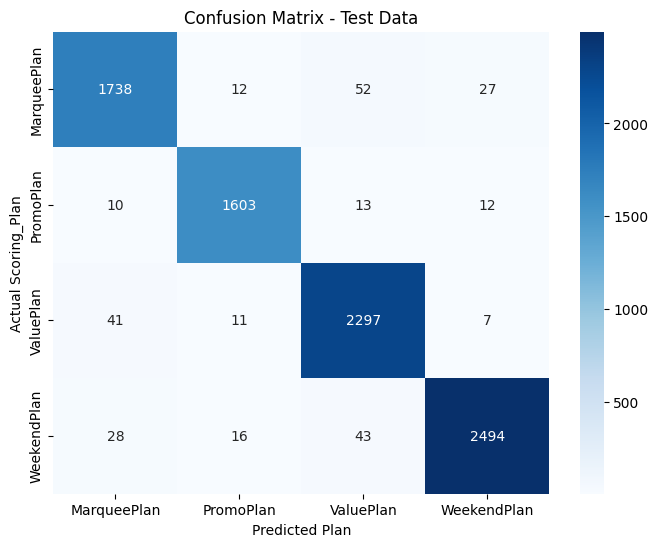

In [22]:
# Cell: Confusion Matrix for Test Data

# Predict on the test set (if not already done)
y_test_pred = model_pipeline.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=model_pipeline.named_steps["classifier"].classes_)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=model_pipeline.named_steps["classifier"].classes_,
            yticklabels=model_pipeline.named_steps["classifier"].classes_)
plt.xlabel("Predicted Plan")
plt.ylabel("Actual Scoring_Plan")
plt.title("Confusion Matrix - Test Data")
plt.show()


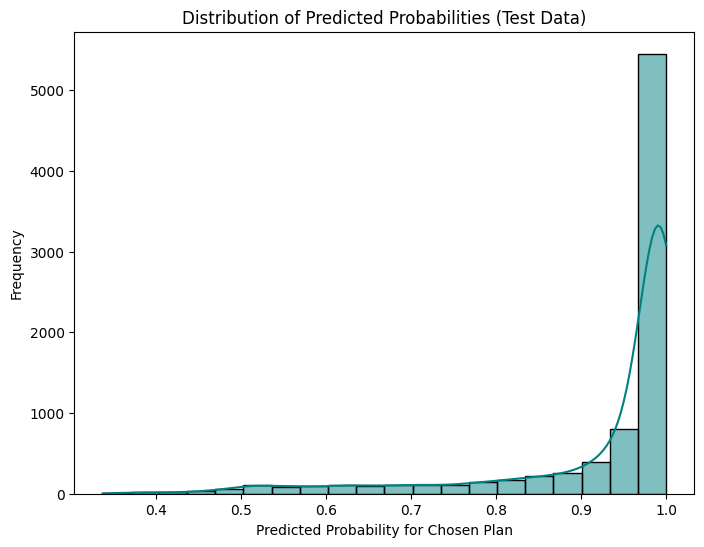

In [23]:
# Cell: Histogram of Predicted Probabilities (Test Data)

# Predict probabilities on the test set
y_test_pred_proba = model_pipeline.predict_proba(X_test)
max_probas = y_test_pred_proba.max(axis=1)

plt.figure(figsize=(8, 6))
sns.histplot(max_probas, bins=20, kde=True, color='teal')
plt.xlabel("Predicted Probability for Chosen Plan")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities (Test Data)")
plt.show()


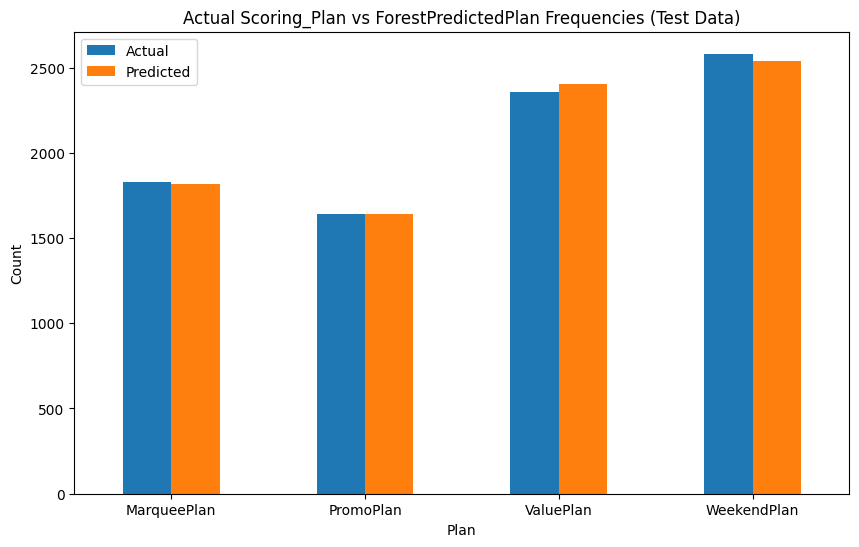

In [24]:
# Cell: Bar Chart Comparison of Predicted vs Actual Plans (Test Data)

# Create a DataFrame for test predictions comparison
test_results = X_test.copy()
test_results["Actual_Scoring_Plan"] = y_test.values
test_results["Predicted_Plan"] = y_test_pred

# Count the frequency of each plan for actual and predicted
actual_counts = test_results["Actual_Scoring_Plan"].value_counts().sort_index()
predicted_counts = test_results["Predicted_Plan"].value_counts().sort_index()

# Combine into one DataFrame
comparison_df = pd.DataFrame({
    "Actual": actual_counts,
    "Predicted": predicted_counts
}).fillna(0)

comparison_df.plot(kind="bar", figsize=(10,6))
plt.xlabel("Plan")
plt.ylabel("Count")
plt.title("Actual Scoring_Plan vs ForestPredictedPlan Frequencies (Test Data)")
plt.xticks(rotation=0)
plt.show()


/var/folders/kr/lr6df7x50wb73xs12zhmg7bw0000gn/T/ipykernel_95611/3367128517.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df.head(20), x="Importance", y="Feature", palette="viridis")


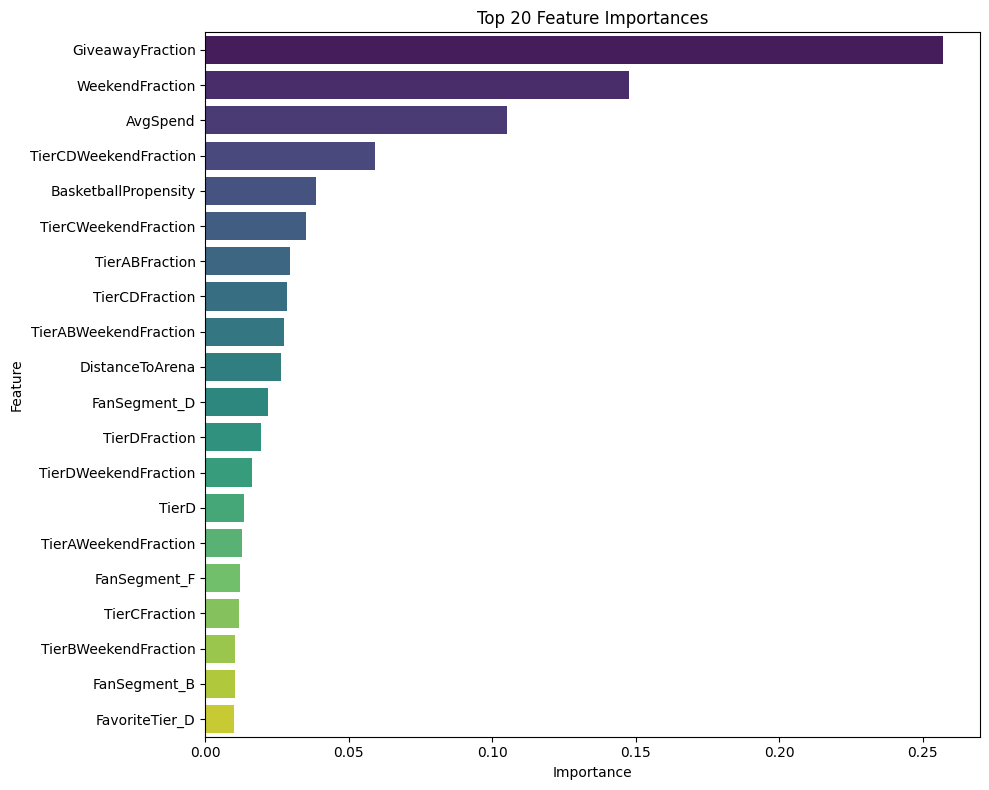

In [25]:
# Cell: Plot Feature Importances

# Function to get feature names from the preprocessor
def get_feature_names(preprocessor):
    # Get numeric feature names (they are unchanged)
    num_features = preprocessor.transformers_[0][2]
    # Get categorical feature names after one-hot encoding
    cat_transformer = preprocessor.transformers_[1][1]
    cat_features = list(cat_transformer.get_feature_names_out(categorical_features))
    return num_features + cat_features

# Retrieve feature names from the preprocessor in our pipeline
feature_names = get_feature_names(model_pipeline.named_steps["preprocessor"])

# Get the feature importances from the random forest classifier
importances = model_pipeline.named_steps["classifier"].feature_importances_

# Create a DataFrame for plotting
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=fi_df.head(20), x="Importance", y="Feature", palette="viridis")
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
